In [24]:
from urllib.request import urlopen  # python自带爬虫库
import json  # python自带的json数据库
from random import randint  # python自带的随机数库
import pandas as pd
pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_rows', 5000)  # 最多显示数据的行数

In [25]:
def _random(n=16):
    """
    创建一个n位的随机整数
    :param n:
    :return:
    """
    start = 10**(n-1)
    end = (10**n)-1
    return str(randint(start, end))

=====获取分钟级别的K线
获取K线数据：http://ifzq.gtimg.cn/appstock/app/kline/mkline?param=sz000001,m5,,640&_var=m5_today&r=0.6508601564534552
正常网址：http://stockhtm.finance.qq.com/sstock/ggcx/000001.shtml

In [26]:
# ===构建网址
# 参数
stock_code = 'sz002952'  # # 正常股票sz000001，指数sh000001, ETF sh510500
k_type = 60  # 1, 5, 15, 30, 60 分钟
num = 1000  # 最多不能超过320

In [27]:
# 构建url
url = 'http://ifzq.gtimg.cn/appstock/app/kline/mkline?param=%s,m%s,,%s&_var=m%s_today&r=0.%s'
url = url % (stock_code, k_type, num, k_type, _random()) # 此次k_type为K线类别，每5分钟，每10分钟，。。。。
url

'http://ifzq.gtimg.cn/appstock/app/kline/mkline?param=sz002952,m60,,1000&_var=m60_today&r=0.7327862517303206'

In [28]:
content = urlopen(url,timeout = 15).read().decode()
content = content.split('=',maxsplit=1)[-1]
content=json.loads(content)
content

{'code': 0,
 'msg': '',
 'data': {'sz002952': {'qt': {'sz002952': ['51',
     '亚世光电',
     '002952',
     '17.08',
     '17.29',
     '17.17',
     '12713',
     '5880',
     '6833',
     '17.07',
     '29',
     '17.06',
     '60',
     '17.05',
     '156',
     '17.04',
     '17',
     '17.02',
     '50',
     '17.08',
     '1',
     '17.09',
     '11',
     '17.10',
     '19',
     '17.11',
     '209',
     '17.12',
     '5',
     '',
     '20230615161421',
     '-0.21',
     '-1.21',
     '17.35',
     '17.06',
     '17.08/12713/21834551',
     '12713',
     '2183',
     '0.97',
     '21.76',
     '',
     '17.35',
     '17.06',
     '1.68',
     '22.31',
     '28.07',
     '3.28',
     '19.02',
     '15.56',
     '0.68',
     '67',
     '17.17',
     '41.28',
     '23.09',
     '',
     '',
     '1.22',
     '2183.4551',
     '0.0000',
     '0',
     ' ',
     'GP-A',
     '17.11',
     '3.55',
     '2.31',
     '14.00',
     '10.80',
     '21.91',
     '10.77',
     '-0.20',
    

In [29]:
k_data = content['data'][stock_code]['m'+str(k_type)]
df = pd.DataFrame(k_data)
df

,0,1,2,3,4,5,6,7
0,202302201030,17.37,17.43,17.56,17.29,10202.00,{},78.0959
1,202302201130,17.43,17.31,17.43,17.26,5424.00,{},41.5205
2,202302201400,17.31,17.52,17.54,17.30,3385.54,{},25.9162
3,202302201500,17.53,17.57,17.63,17.49,6190.50,{},47.3880
4,202302211030,17.50,17.66,17.72,17.50,8436.00,{},64.5772
5,202302211130,17.66,17.56,17.66,17.47,4774.00,{},36.5448
6,202302211400,17.55,17.48,17.64,17.48,2682.00,{},20.5306
7,202302211500,17.48,17.59,17.62,17.41,4885.00,{},37.3945
8,202302221030,17.57,17.43,17.71,17.41,9574.00,{},73.2886
9,202302221130,17.43,17.55,17.58,17.41,4418.50,{},33.8234


In [30]:
# ===对数据进行整理
rename_dict = {0: 'candle_end_time', 1: 'open', 2: 'close', 3: 'high', 4: 'low', 5: 'amount'}
# 其中amount单位是手
df.rename(columns=rename_dict, inplace=True)
df

,candle_end_time,open,close,high,low,amount,6,7
0,202302201030,17.37,17.43,17.56,17.29,10202.00,{},78.0959
1,202302201130,17.43,17.31,17.43,17.26,5424.00,{},41.5205
2,202302201400,17.31,17.52,17.54,17.30,3385.54,{},25.9162
3,202302201500,17.53,17.57,17.63,17.49,6190.50,{},47.3880
4,202302211030,17.50,17.66,17.72,17.50,8436.00,{},64.5772
5,202302211130,17.66,17.56,17.66,17.47,4774.00,{},36.5448
6,202302211400,17.55,17.48,17.64,17.48,2682.00,{},20.5306
7,202302211500,17.48,17.59,17.62,17.41,4885.00,{},37.3945
8,202302221030,17.57,17.43,17.71,17.41,9574.00,{},73.2886
9,202302221130,17.43,17.55,17.58,17.41,4418.50,{},33.8234


In [31]:
df['candle_end_time'] = df['candle_end_time'].apply(lambda x: '%s-%s-%s %s:%s' % (x[0:4], x[4:6], x[6:8], x[8:10], x[10:12]))
df

,candle_end_time,open,close,high,low,amount,6,7
0,2023-02-20 10:30,17.37,17.43,17.56,17.29,10202.00,{},78.0959
1,2023-02-20 11:30,17.43,17.31,17.43,17.26,5424.00,{},41.5205
2,2023-02-20 14:00,17.31,17.52,17.54,17.30,3385.54,{},25.9162
3,2023-02-20 15:00,17.53,17.57,17.63,17.49,6190.50,{},47.3880
4,2023-02-21 10:30,17.50,17.66,17.72,17.50,8436.00,{},64.5772
5,2023-02-21 11:30,17.66,17.56,17.66,17.47,4774.00,{},36.5448
6,2023-02-21 14:00,17.55,17.48,17.64,17.48,2682.00,{},20.5306
7,2023-02-21 15:00,17.48,17.59,17.62,17.41,4885.00,{},37.3945
8,2023-02-22 10:30,17.57,17.43,17.71,17.41,9574.00,{},73.2886
9,2023-02-22 11:30,17.43,17.55,17.58,17.41,4418.50,{},33.8234


In [35]:
df = df[['candle_end_time', 'open', 'high', 'low', 'close', 'amount']]
df

,candle_end_time,open,high,low,close,amount
0,2023-02-20 10:30:00,17.37,17.56,17.29,17.43,10202.00
1,2023-02-20 11:30:00,17.43,17.43,17.26,17.31,5424.00
2,2023-02-20 14:00:00,17.31,17.54,17.30,17.52,3385.54
3,2023-02-20 15:00:00,17.53,17.63,17.49,17.57,6190.50
4,2023-02-21 10:30:00,17.50,17.72,17.50,17.66,8436.00
5,2023-02-21 11:30:00,17.66,17.66,17.47,17.56,4774.00
6,2023-02-21 14:00:00,17.55,17.64,17.48,17.48,2682.00
7,2023-02-21 15:00:00,17.48,17.62,17.41,17.59,4885.00
8,2023-02-22 10:30:00,17.57,17.71,17.41,17.43,9574.00
9,2023-02-22 11:30:00,17.43,17.58,17.41,17.55,4418.50


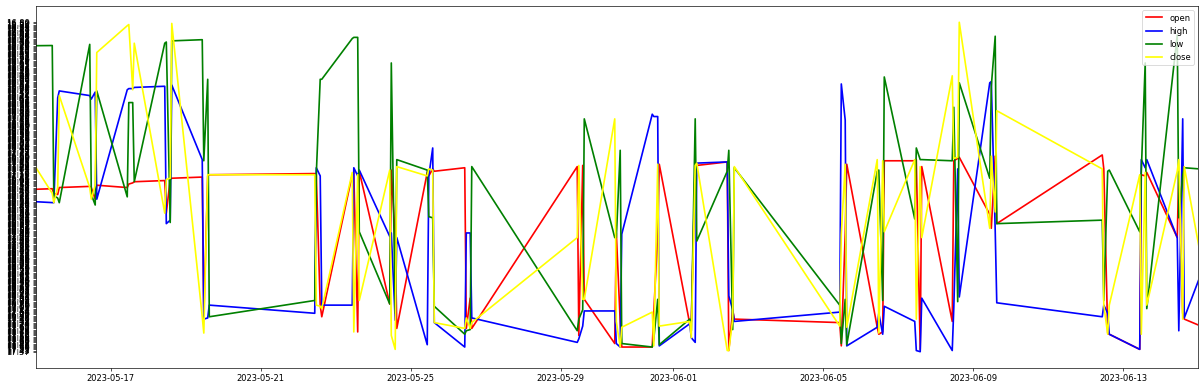

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8),dpi=60)
plt.plot(df['candle_end_time'],df['open'],color='red',label='open',linewidth=2)
plt.plot(df['candle_end_time'],df['high'],color='blue',label='high',linewidth=2)
plt.plot(df['candle_end_time'],df['low'],color='green',label='low',linewidth=2)
plt.plot(df['candle_end_time'],df['close'],color='yellow',label='close',linewidth=2)
plt.legend(loc='upper right')
plt.xlim('2023-05-15','2023-06-15')
plt.show()